# <center> PPOL564 | Data Science 1: Foundations </center>

## <center> Coding Discussion - 6 </center>



#### By      : Sonali Subbu Rathinam 
#### NetID : ss4608
#### Date   : 21/11/2021

In [1]:
#Importing required modules

# Data Management/Investigation
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.svm import SVR


# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [2]:
#Reading in the training data
train_data = pd.read_csv("C:/Users/sonal/coding_discussions_ppol564_fall2021/06_coding_discussion/train_data.csv")
#Reading in the test data
test_data = pd.read_csv("C:/Users/sonal/coding_discussions_ppol564_fall2021/06_coding_discussion/test_data.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#Checking for missing data in each column
train_data.isna().sum()

OBJECTID                 0
SSL                      0
BATHRM                   1
HF_BATHRM                2
HEAT                     1
HEAT_D                   1
AC                       1
NUM_UNITS                1
ROOMS                   11
BEDRM                    4
AYB                      4
YR_RMDL              18583
EYB                      0
STORIES                 29
SALEDATE                 0
QUALIFIED                0
SALE_NUM                 0
GBA                      0
BLDG_NUM                 0
STYLE                    1
STYLE_D                  1
STRUCT                   1
STRUCT_D                 1
GRADE                    1
GRADE_D                  1
CNDTN                    1
CNDTN_D                  1
EXTWALL                  1
EXTWALL_D                1
ROOF                     1
ROOF_D                   1
INTWALL                  1
INTWALL_D                1
KITCHENS                 2
FIREPLACES               1
USECODE                  0
LANDAREA                 0
G

From this, we can see the missing values for our columns of interest, which are LandArea, Rooms, Bathrooms, Kitchens, Fireplaces. We notice that our target variable, LN_Price does not have any missing variable. 

In [5]:
test_data.isna().sum()

OBJECTID                0
SSL                     0
BATHRM                  0
HF_BATHRM               0
HEAT                    0
HEAT_D                  0
AC                      0
NUM_UNITS               0
ROOMS                   2
BEDRM                   0
AYB                     1
YR_RMDL              6202
EYB                     0
STORIES                 7
SALEDATE                0
QUALIFIED               0
SALE_NUM                0
GBA                     0
BLDG_NUM                0
STYLE                   0
STYLE_D                 0
STRUCT                  0
STRUCT_D                0
GRADE                   0
GRADE_D                 0
CNDTN                   0
CNDTN_D                 0
EXTWALL                 0
EXTWALL_D               0
ROOF                    0
ROOF_D                  0
INTWALL                 0
INTWALL_D               0
KITCHENS                0
FIREPLACES              1
USECODE                 0
LANDAREA                0
GIS_LAST_MOD_DTTM       0
LN_PRICE    

In [6]:
#Checking the maximum and minimum value of our target variable
max = train_data['LN_PRICE'].max()
print(max)

min = train_data['LN_PRICE'].min()
print(min)

17.038378404102012
0.0


We see that the minimum value for LN_PRICE is 0. We will be removing the rows for which the LN_PRICE =0

In [7]:
# Only houses that are sold
train_data = train_data[train_data.LN_PRICE > 0]
test_data = test_data[test_data.LN_PRICE >0]


In [8]:
#Dropping the rows in which our predictor variables have missing values
train_data = train_data.dropna(subset=['BATHRM', 'ROOMS', 'LANDAREA', 'KITCHENS', 'FIREPLACES'])
test_data = test_data.dropna(subset=['BATHRM', 'ROOMS', 'LANDAREA', 'KITCHENS', 'FIREPLACES'])


In [9]:
# Remove the observations which are not finite
train_data = train_data[~train_data.isin([np.nan, np.inf, -np.inf]).any(1)]
test_data = test_data[~test_data.isin([np.nan, np.inf, -np.inf]).any(1)]


In [10]:
#Splitting into X and Y for training and testing
train_y = train_data['LN_PRICE']
train_X = train_data[['BATHRM', 'ROOMS', 'LANDAREA', 'KITCHENS', 'FIREPLACES']]

test_y = test_data['LN_PRICE']
test_X = test_data[['BATHRM', 'ROOMS', 'LANDAREA', 'KITCHENS', 'FIREPLACES']]


#We are changing this to log as this column has a very large range
train_X['LANDAREA'] = np.log(train_X['LANDAREA'])
test_X['LANDAREA'] = np.log(test_X['LANDAREA'])

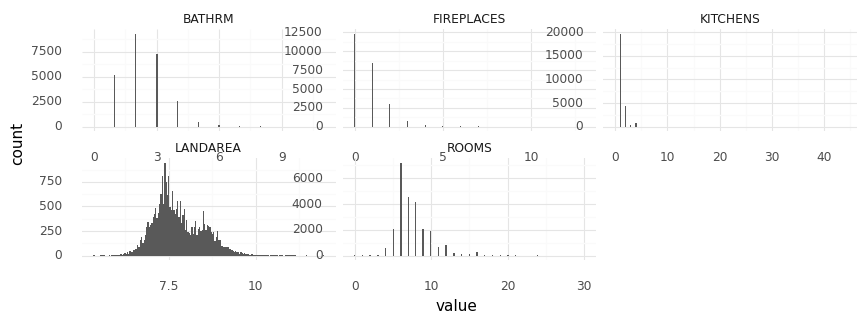

<ggplot: (146823474420)>

In [11]:
#Plotting to see distribution of data

(
    ggplot(train_X.melt(),aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

This shows that the data needs to be pre processed as LANDAREA scale is different from the others

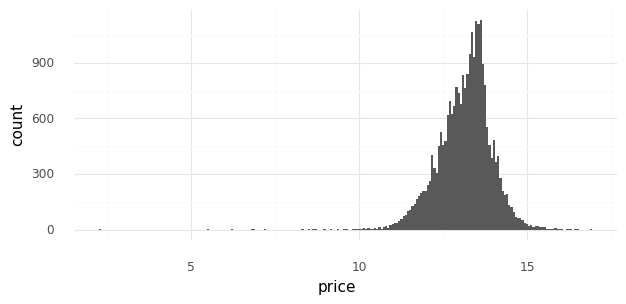

<ggplot: (146822042106)>

In [12]:
#Visualising our target variable
(
    ggplot(pd.DataFrame(dict(price=train_y)),
           aes(x="price")) +
    geom_histogram() +
    theme_minimal() +
    theme(figure_size = (7,3)) 
)

Target Variable seems fine

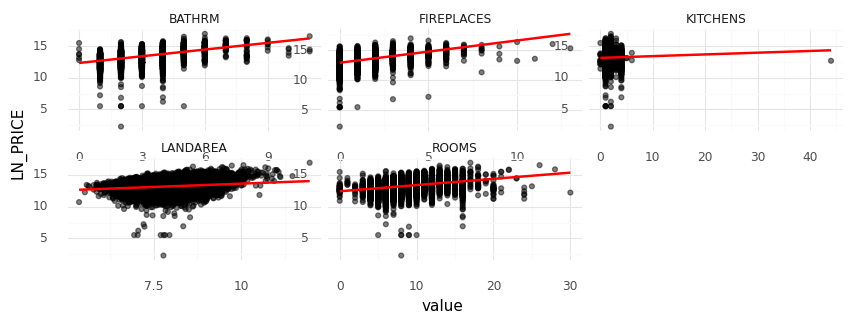

<ggplot: (146821782589)>

In [13]:
#Seeing how our predictor variables describe the target variable
D = train_X.copy()
D['LN_PRICE'] = train_y

(
    ggplot(D.melt(id_vars=["LN_PRICE"]),
           aes(x="value",y="LN_PRICE"))+
    geom_point(alpha=.5) +
    facet_wrap("variable",scales="free") +
     geom_smooth(method="lm",se=False,color="red") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
)

We notice positive correlations between LN_PRICE and the predictor variables. (Higher positive relation for BATHRM, FIREPLACES and ROOMS as compared to KITCHENS and LANDAREA. 

In [14]:
#Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['BATHRM','ROOMS','LANDAREA'])])


# Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])

In [15]:
# Specify the models and their respective tuning parameters. 
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},    
]

In [16]:
# Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

In [17]:
# Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['BATHRM',
                                                                          'ROOMS',
                                                                          'LANDAREA'])])),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsRegressor(n_neighbors=30)],
                          'model__n_neighbors': [10, 15, 20, 25, 30]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth': [1, 2, 3, 5]},
                         {'model': [BaggingR

In [18]:
search.best_score_ # Mean out-of-sample (CV) error

-0.4397450242579559

In [19]:
#Searching for best model
search.best_params_

{'model': KNeighborsRegressor(n_neighbors=30), 'model__n_neighbors': 30}

### Working on Test Data

In [20]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)

In [21]:
m.mean_squared_error(test_y,pred_y)

0.431744105709428

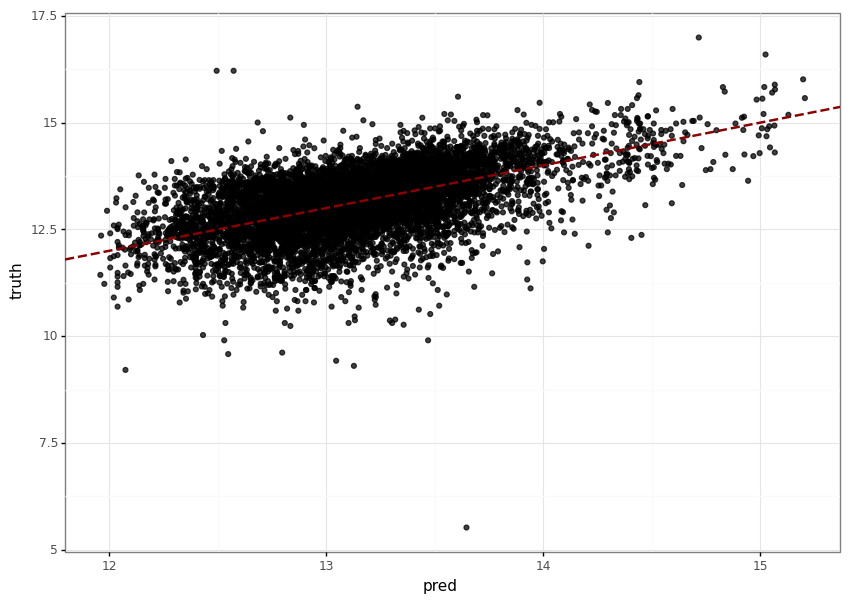

<ggplot: (146823379360)>

In [22]:
#Visualizing the result

(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)

The KNN model with 30 nearest neighbours is the best among the models used above. When the same model was used on our test data, we report a mean squared error of 0.4317. This is lower than the mean squared error reported in class. 